# Data Challenge #2 Pricing Test



Company XYZ sells a software for \$39. Since revenue has been flat for some time, the VP of
Product has decided to run a test increasing the price. She hopes that this would increase
revenue. In the experiment, 66\% of the users have seen the old price ($39), while a random
sample of 33\% users a higher price (\$59).
The test has been running for some time and the VP of Product is interested in understanding
how it went and whether it would make sense to increase the price for all the users.
Especially he asked you the following questions:

Q1: Should the company sell its software for \$39 or \$59?

Q2: The VP of Product is interested in having a holistic view into user behavior, especially
focusing on actionable insights that might increase conversion rate. What are your main
findings looking at the data?

Q3: [Bonus] The VP of Product feels that the test has been running for too long and he should
have been able to get statistically significant results in a shorter time. Do you agree with
her intuition? After how many days you would have stopped the test? Please, explain
why.

## Step 1: data description of two tables

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import dateutil

In [3]:
df1 = pd.read_csv('test_results.csv')
df1.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [4]:
len(df1)

316800

In [5]:
# every single entry is a unique user
len(df1.user_id.unique())

316800

In [6]:
print df1.timestamp.max()
print df1.timestamp.min()
# overall, the test ran for 90 days

2015-05-31 23:59:45
2015-03-02 00:04:12


In [7]:
df1['operative_system'].value_counts()

windows    100976
iOS         95465
android     74935
mac         25085
other       16204
linux        4135
Name: operative_system, dtype: int64

In [8]:
df1['source'].value_counts()

direct_traffic     60357
ads-google         59379
ads_facebook       53396
ads_other          29876
seo-google         23175
ads-bing           22873
seo_facebook       21205
friend_referral    20695
seo-other           9260
ads-yahoo           7583
seo-yahoo           6848
seo-bing            2153
Name: source, dtype: int64

In [9]:
df1['device'].value_counts()

mobile    186471
web       130329
Name: device, dtype: int64

In [10]:
df1['price'].value_counts()
# 1 represents new price, 0 represents old price

39    202672
59    114128
Name: price, dtype: int64

In [11]:
df1['converted'].value_counts()
# pertentage of purchasing is only 1.83%

0    310992
1      5808
Name: converted, dtype: int64

In [12]:
# check for NaN
#df1.isnull()     # returns a table of true and false
#df1.isnull().any()    # returns true/false for each column
df1.isnull().any().any()   
# there is no NaNs in df1

False

In [13]:
df2 = pd.read_csv('user_table.csv')
df2.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [14]:
df2.shape

(275616, 5)

In [15]:
# only US users 
df2['country'].value_counts()

USA    275616
Name: country, dtype: int64

In [16]:
df2['city'].value_counts().head()
# Users come from 923 different cities. Top 3 cities are NY, Chicago, and Houston.

New York       25748
Chicago         7153
Houston         6706
San Antonio     4633
Los Angeles     4141
Name: city, dtype: int64

In [17]:
# every single entry is a unique user
len(df2.user_id.unique())

275616

In [18]:
df2.isnull().any().any()  
# There is no NaN in df2

False

## Step 2

To decide whether the company should sell at \$39 or \$59.

1. divide into two groups: \$39 group and \$59 group, calling them group A and group B
2. for each group, compute the conversion percentage, and the profit
3. compare the conversion percentage values, we should choose the price used by group with higher conversion percentage

In [19]:
df1_a = df1[df1.price == 39]
df1_a.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0


In [20]:
conv_rate_A = df1_a.converted.mean()
conv_rate_A_std = df1_a.converted.std()
print 'The conversion rate for group A', conv_rate_A
print 'The std of converstion rate for group A', conv_rate_A_std
profit_A = conv_rate_A * 39
print 'Every visitor in group A brings profit of', profit_A

The conversion rate for group A 0.0198892792295
The std of converstion rate for group A 0.139620170409
Every visitor in group A brings profit of 0.77568188995


In [21]:
df1_b = df1[df1.price == 59]
df1_b.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0
15,552048,2015-03-22 08:58:32,ads-bing,web,windows,1,59,0


In [22]:
conv_rate_B = df1_b.converted.mean()
conv_rate_B_std = df1_b.converted.std()
print 'The conversion rate for group B', conv_rate_B
print 'The std of converstion rate for group B', conv_rate_B_std
profit_B = conv_rate_B * 59
print 'Every visitor in group B brings profit of', profit_B

The conversion rate for group B 0.015570236927
The std of converstion rate for group B 0.123806053785
Every visitor in group B brings profit of 0.918643978691


The company can earn 0.78 dollars per visitor, setting a price at \$39.
The company can earn 0.92 dollars per visitor, setting a price at \$59.
Increasing price to \$59 is strongly advised, since it boosts profit by 18%.

Let's assume the sample size is large enough, in order to match the profit using the old price, the conversion rate for the new rate should be:  conv_rate_A*39/59=0.01314

In [23]:
breakeven_point_conv_rate = conv_rate_A*39/59
print breakeven_point_conv_rate

0.0131471506771


During the test, group B conversion rate reached 1.557%, while the 'break-even' point for the group B conversion rate is 1.315%.

The null hypothesis is the group B conversion rate is 1.315%, which doesn't favor increasing price. The alternative hypothesis is the group B converstion rate less than 1.315%, which favors increasing price. 

Since the sample size is 114128, which is much larger than 30. A Z-statistic should be calculated, instead of a t-statistic. 

Let's run a Z-test:
The sample size of group B: n = 114128
population mean: mu_population = 0.0131471506771
sample mean: mu_sample = 0.015570236927
The std of sample: std_sample = 0.123806053785


In [25]:
n = 114128
mu_population = 0.0131471506771
mu_sample = 0.015570236927
std_sample = 0.123806053785
Z_statistic = (mu_sample - mu_population)/(std_sample/np.sqrt(n))
print Z_statistic

6.61185156925


The Z score of 6.61185 corresponds to a p-value of 0.00001. The result is significant at p < 0.05. So raising the price to \$59 is advised.

A Z score of 1.645 approximately corresponds to a p-value of 0.05.

In [69]:
df1b = df1_b.sort_values(by='timestamp')
df1b.head()
df1b_new = pd.DataFrame(columns=['timestamp','Z_score'])

In [102]:
df1b_new.drop(df1b_new.index, inplace=True)

for magic_num in range(10, 11000, 10):
    mu_sample_magic = df1_b.converted[:magic_num].mean()
    std_sample_magic = df1_b.converted[:magic_num].std()
    Z_statistic_magic = (mu_sample_magic - mu_population)/(std_sample_magic/np.sqrt(magic_num))
    #print Z_statistic_magic
    magic_timestamp = df1b.iloc[magic_num-1, 1]
    #print magic_timestamp
    df1b_new = df1b_new.append({"timestamp":magic_timestamp, "Z_score": Z_statistic_magic}, ignore_index=True)

    
df1b_new['timestamp'] = pd.to_datetime(df1b_new['timestamp'], errors ='coerce')
# drop all the NaT's
df1b_new = df1b_new.dropna(axis=0, how='any')
df1b_new.tail()
# around 1 week, the A/B test  can stop

,timestamp,Z_score
1093,2015-03-12 10:31:12,1.879169
1094,2015-03-12 10:42:02,1.868934
1095,2015-03-12 10:50:33,1.858699
1097,2015-03-12 11:04:03,1.910387
1098,2015-03-12 11:13:45,1.900182


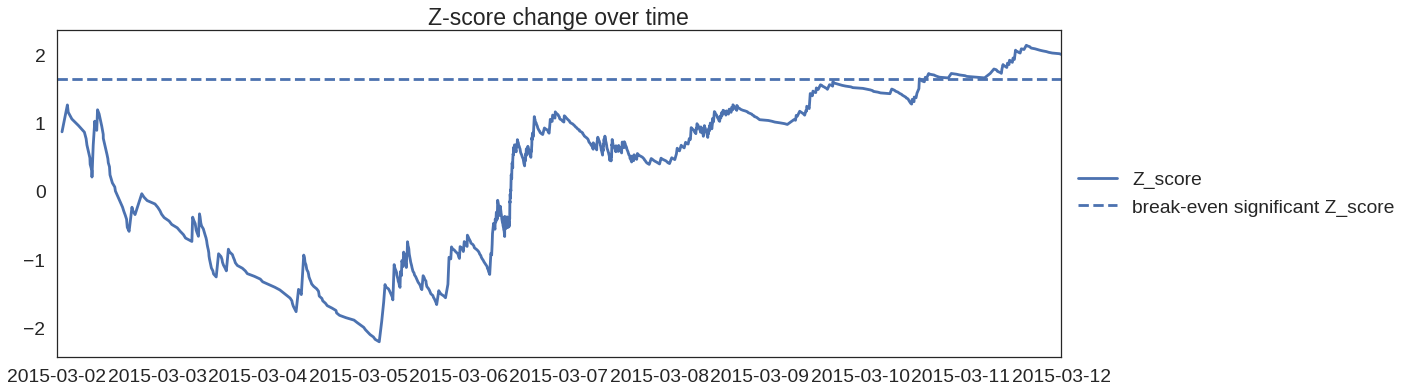

In [106]:
import datetime
enddate = datetime.datetime(2015,3,12)
startdate = datetime.datetime(2015,3,2)

fig = plt.figure(figsize(18, 6))
ax = plt.axes()
ax.plot(df1b_new.timestamp, df1b_new.Z_score, label='Z_score')
plt.axhline(1.645, linestyle='--', label='break-even significant Z_score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_ylim(0, 0.03)
ax.set_xlim(startdate, enddate)
plt.title('Z-score change over time')
plt.show()

## Step 2

Look into user behavior, look for features that might increase conversion rate.
Remember that pertentage of purchasing is only 1.83%, it is an unbalanced classification problem.

class 0:    310992
class 1:      5808


1. join two tables
2. select features: timestamp (month, week, hour), source, device, operative_system, price, city
   Note: there are 923 different cities, top user cities will be labeled as their real city names. Other cities will be labeled as "others"
3. create a new dataframe df2 that contains over-sampled "1" class and under-sampled "0" class
4. run random forests, extracting feature importance


In [22]:
df1.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [23]:
# drop the price column, same info is given in "test" column
df1_temp = df1.drop('price',1)
df1_temp.head()

,user_id,timestamp,source,device,operative_system,test,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,0


In [24]:
df2.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [25]:
df2_temp = df2[['user_id', 'city']]
df2_temp.head()

,user_id,city
0,510335,Peabody
1,89568,Reno
2,434134,Rialto
3,289769,Carson City
4,939586,Chicago


In [26]:
# join two tables df1_temp and df2_temp

# I need to rejoin the table, it is not right
df3 = pd.merge(df1_temp, df2_temp, how='inner',on='user_id')
df4 = df3
df3.head()
#result1.head()

# all users in df2 appears in df1, the joined table has 275616 entries

,user_id,timestamp,source,device,operative_system,test,converted,city
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,0,Buffalo
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,0,Lakeville
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,0,Parma
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,0,Fayetteville
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,0,Fishers


In [27]:
# try to convert timestamp to pandas datetime, it complains about the minute out of range of 0:59
# I found one entry says "11:60:20"
# If 'coerce', then invalid parsing will be set as NaT

df4['timestamp'] = pd.to_datetime(df4['timestamp'], errors ='coerce')
df4.head()

,user_id,timestamp,source,device,operative_system,test,converted,city
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,0,Buffalo
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,0,Lakeville
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,0,Parma
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,0,Fayetteville
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,0,Fishers


In [28]:
#only year 2015 info, will not include this information in Machine learning
#df4['year'] = df4['timestamp'].dt.year
df4['month'] = df4['timestamp'].dt.month
df4['hour'] = df4['timestamp'].dt.hour
df4.head()

,user_id,timestamp,source,device,operative_system,test,converted,city,month,hour
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,0,Buffalo,5.0,3.0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,0,Lakeville,5.0,21.0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,0,Parma,4.0,15.0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,0,Fayetteville,5.0,7.0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,0,Fishers,5.0,11.0


Before ML, need to drop some not-so-useful columns, and form X and y

In [29]:
df5 = df4.drop(labels=['user_id', 'timestamp','city', 'test'], axis=1)
df5.head()

,source,device,operative_system,converted,month,hour
0,ads_facebook,mobile,iOS,0,5.0,3.0
1,seo-google,mobile,android,0,5.0,21.0
2,ads-bing,mobile,android,0,4.0,15.0
3,direct_traffic,mobile,iOS,0,5.0,7.0
4,ads_facebook,web,mac,0,5.0,11.0


In [30]:
# dummify categorical features
df5=pd.get_dummies(columns=['source', 'device', 'operative_system', 'month', 'hour'], data=df5)
df5.head()

,converted,source_ads-bing,source_ads-google,source_ads-yahoo,source_ads_facebook,source_ads_other,source_direct_traffic,source_friend_referral,source_seo-bing,source_seo-google,...,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y = df5['converted']
X = df5.loc[:, df5.columns != 'converted']
X.head()

,source_ads-bing,source_ads-google,source_ads-yahoo,source_ads_facebook,source_ads_other,source_direct_traffic,source_friend_referral,source_seo-bing,source_seo-google,source_seo-other,...,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5 )
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()


,source_ads-bing,source_ads-google,source_ads-yahoo,source_ads_facebook,source_ads_other,source_direct_traffic,source_friend_referral,source_seo-bing,source_seo-google,source_seo-other,...,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,converted
116526,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4210,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90589,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197725,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# under-sampling and oversampling 
from sklearn.utils import resample


df_train_majority = df_train[df_train.converted==0]
df_train_minority = df_train[df_train.converted==1]

nsamples = int(len(df_train_majority))

# Upsample minority class
df_train_minority_upsampled = resample(df_train_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=nsamples,    # to match majority class
                                 random_state=123) # reproducible results




# Combine majority class with upsampled minority class
df_train_upsampled = pd.concat([df_train_majority, df_train_minority_upsampled])

print df_train_upsampled.converted.value_counts()

y_train = df_train_upsampled['converted']
X_train = df_train_upsampled.loc[:, df_train_upsampled.columns != 'converted']



1    189419
0    189419
Name: converted, dtype: int64


In [34]:
for j in [10, 20, 30, 40]:
    list_a = []
    for i in range(j):
        random_forest = RandomForestClassifier(n_estimators=20 ,min_samples_leaf=5, max_depth=3, max_features=3)
        random_forest.fit(X_train, y_train)
        y_pred_RF = random_forest.predict(X_test)
        #score_train_RF = random_forest.score(X_train, y_train)*100
        score_test_RF = random_forest.score(X_test, y_test)*100
        print score_test_RF 
        list_a.append(score_test_RF)
    print 'The number of iteration is:', j
    print 'The mean test score is: ', np.mean(list_a)

50.6198222168
67.8260869565
56.4552216242
58.0504323638
53.2140049586
61.7016387495
58.580153595
55.0897986334
62.8142952168
65.4532260991
The number of iteration is: 10
The mean test score is:  58.9804680414
59.2924956159
59.6226643285
60.1281973756
57.8738586201
56.0742577251
58.3346435266
52.3541150148
61.4391969523
62.162423656
60.2249501119
54.4149482978
59.0590796396
59.8476144403
60.2721170708
58.9720021769
60.0786115982
51.1229364455
55.0184434904
58.0528511822
55.705387918
The number of iteration is: 20
The mean test score is:  58.0025397593
41.5141803229
51.2269456371
60.7824877547
69.5470762533
58.4894479047
59.7133700187
56.0730483159
69.3402672794
54.6773900949
57.0744391365
58.4108363065
61.0618612808
63.7745661244
60.4390155409
76.768458608
53.1861885469
55.9569450324
52.337183286
54.6120819979
59.6843441979
55.2905605612
53.5308701699
54.2661909657
51.9755699341
55.5106730362
57.6259297333
59.263469795
55.0777045413
54.2286992804
60.8586805346
The number of iteration is

In [35]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
(tn,fp,fn,tp)

(44794, 36384, 630, 877)

In [36]:
precision = float(tp)/(tp+fp)
print 'precision', precision

precision 0.0235366737339


In [37]:
recall = float(tp)/(tp+fn)
print 'recall', recall

recall 0.58195089582


In [38]:
F1= 2*precision*recall/(precision+recall)
print 'F1', F1

F1 0.0452434997936


Populating the interactive namespace from numpy and matplotlib


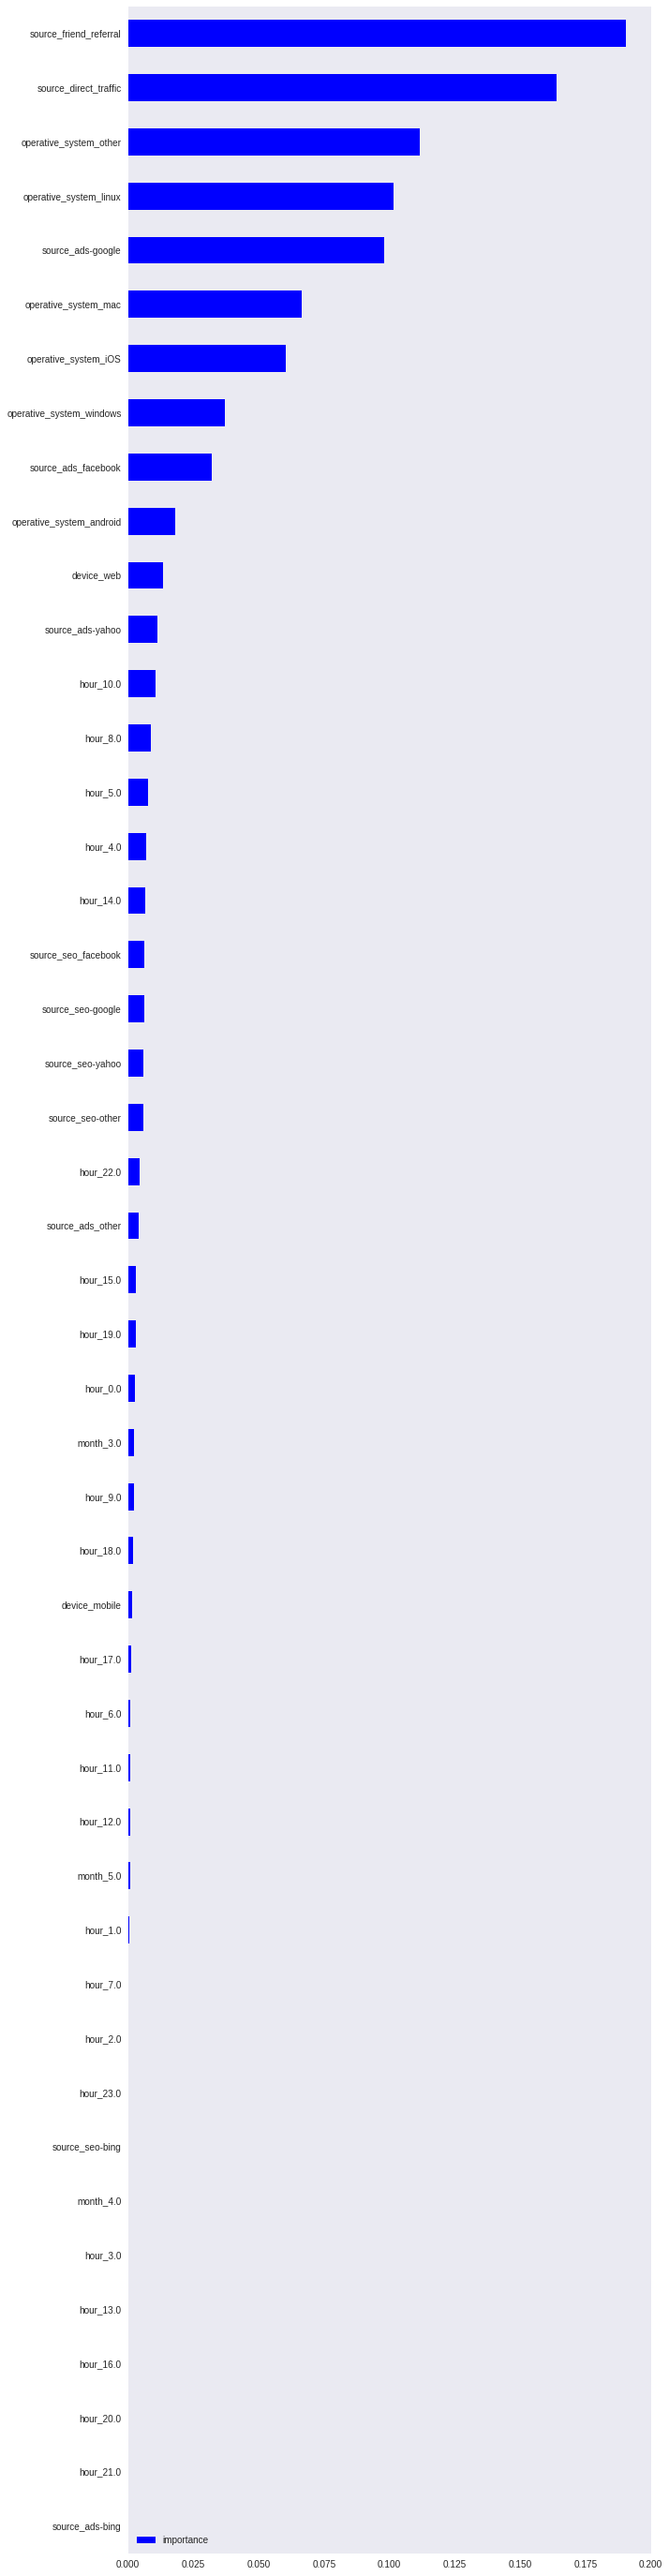

In [39]:
# predict feature importance
%pylab inline
names = X_train.columns
ratios = random_forest.feature_importances_

feature_important = pd.DataFrame(index=names, data=ratios, columns=['importance'])
feature_important = feature_important.sort_values(by=['importance'], ascending=True)
feature_important.plot(kind='barh', stacked=True, color=['blue'], grid=False, figsize=(10, 50))

To increase conversion rate, here are features that are relatively important

Source: direct traffic, friend referral, ads-bing
Oprative system: mac, IOS

Q3: [Bonus] The VP of Product feels that the test has been running for too long and he should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain why.

The pricing A/B test ran for 90 days from March 2nd to May 31st.